<a href="https://colab.research.google.com/github/ajaysuseel/PyTorch-start/blob/main/Copy_of_CustomImageInpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%pip install -Uq diffusers ftfy accelerate

In [23]:
# Installing transformers from source for now since we need the latest version for Depth2Img
%pip install -Uq git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [24]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

# We'll be exploring a number of pipelines today!
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionDepth2ImgPipeline
    )

# We'll use a couple of demo images later in the notebook
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

# Download images for inpainting example
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [25]:
device = 'cuda'

# Load the inpainting pipeline (requires a suitable inpainting model)
pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting")
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

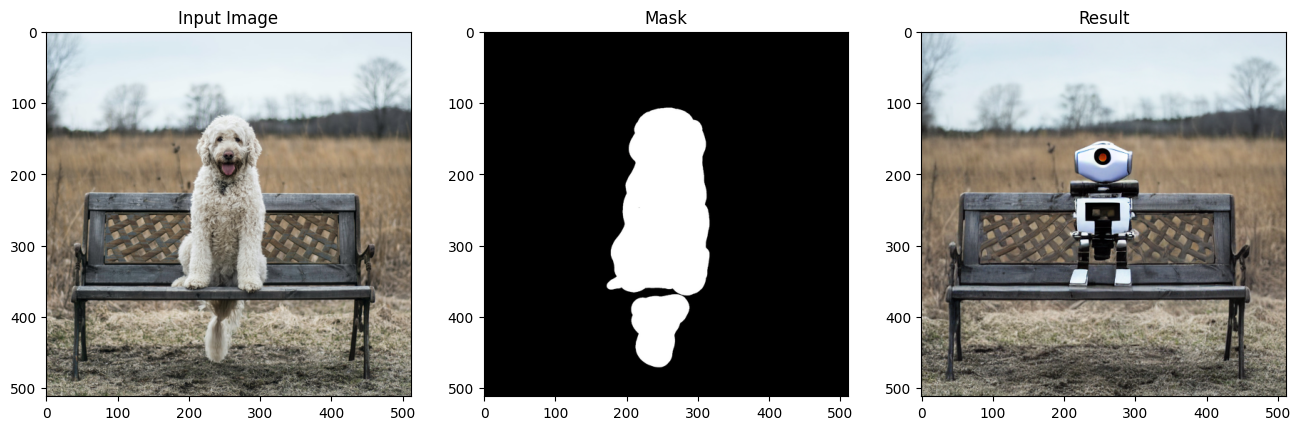

In [26]:
# Inpaint with a prompt for what we want the result to look like
prompt = "A small robot, high resolution, sitting on a park bench"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

# View the result
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(mask_image);axs[1].set_title('Mask')
axs[2].imshow(image);axs[2].set_title('Result');

In [40]:
from google.colab import files
uploaded = files.upload()
image_filename = next(iter(uploaded))  # Get the name of the uploaded file
print(f'Uploaded image: {image_filename}')

Saving IMG-20250207-WA0009.jpg to IMG-20250207-WA0009.jpg
Uploaded image: IMG-20250207-WA0009.jpg


In [41]:
from PIL import Image
image = Image.open(image_filename)
image.show()  # Show the image

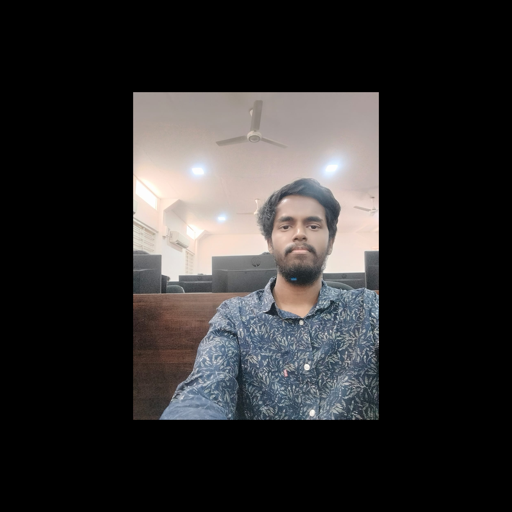

In [42]:
from PIL import Image

# Assuming 'image' is already loaded and cropped

# Get the dimensions of the image
width, height = image.size

size = 2500

# Calculate the coordinates to crop the image
left = (width - size) / 2
top = (height - size) / 2
right = (width + size) / 2
bottom = (height + size) / 2

# Perform the crop
image = image.crop((left, top, right, bottom))

# Resize the image to 512x512
image = image.resize((512, 512))

# Display the resized image
image

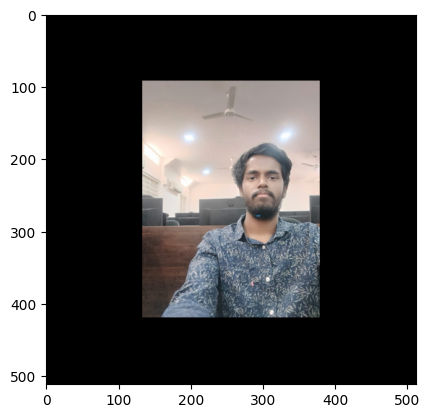

In [45]:
import matplotlib.pyplot as plt
plt.imshow(image)

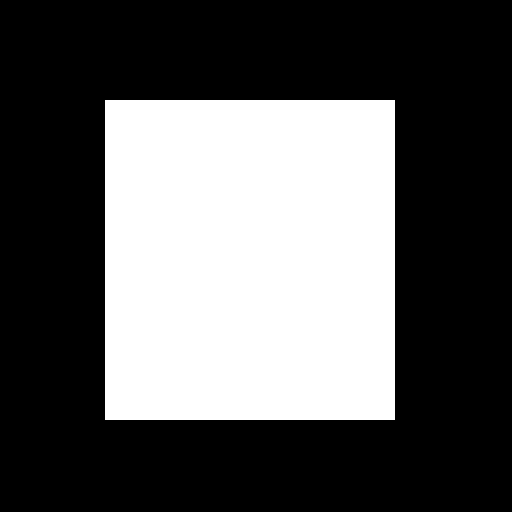

In [46]:
from PIL import Image

# Define the image size (can be adjusted based on your needs)
image_width = 512
image_height = 512

# Define the mask region
mask_xt = 105
mask_yt = 100
mask_xb = 105+290
mask_yb = 100 + 320

# Create a black image (all pixels are black)
mask_image = Image.new('RGB', (image_width, image_height), color=(0, 0, 0))

# Access the pixel data
pixels = mask_image.load()

# Set the pixels in the mask region to white
for x in range(mask_xt, mask_xb):
    for y in range(mask_yt, mask_yb):
        pixels[x, y] = (255, 255, 255)  # Set to white

# Display the image
mask_image

  0%|          | 0/50 [00:00<?, ?it/s]

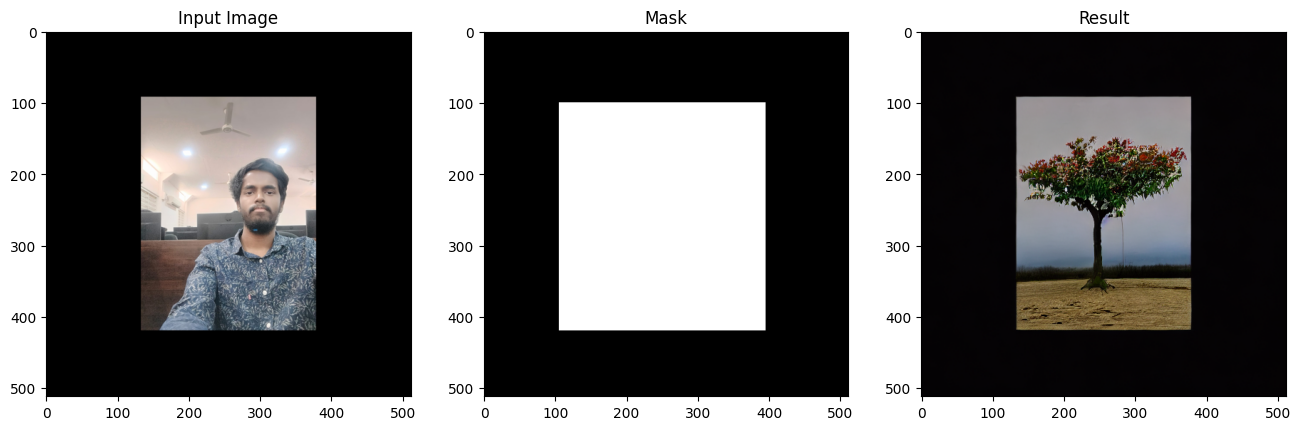

In [47]:
# Inpaint with a prompt for what we want the result to look like
prompt = "A cocunet tree"
output = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

# View the result
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(image);axs[0].set_title('Input Image')
axs[1].imshow(mask_image);axs[1].set_title('Mask')
axs[2].imshow(output);axs[2].set_title('Result');

  0%|          | 0/50 [00:00<?, ?it/s]

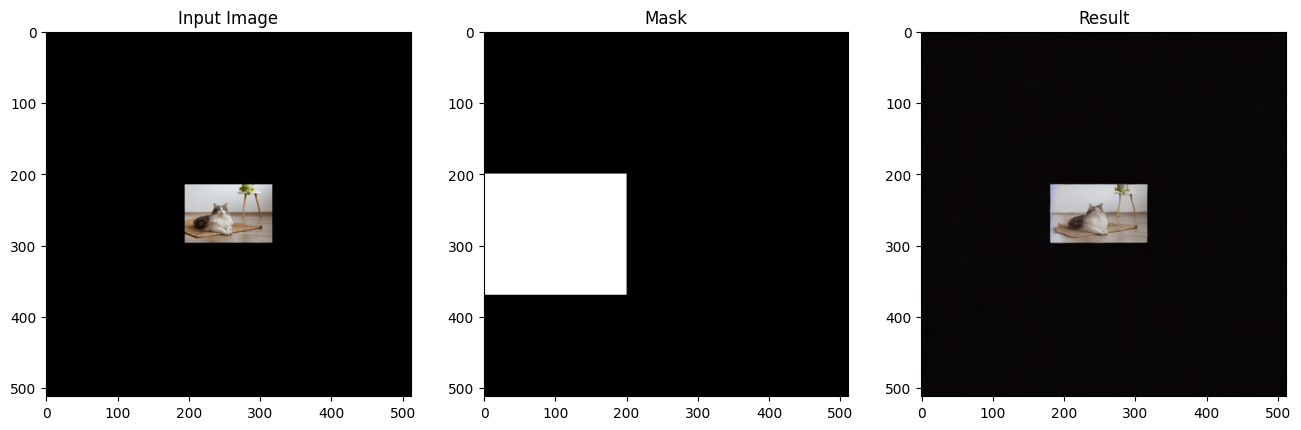

In [33]:
# Inpaint with a prompt for what we want the result to look like
prompt = "neon lighting and a peacock"
output = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

# View the result
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(image);axs[0].set_title('Input Image')
axs[1].imshow(mask_image);axs[1].set_title('Mask')
axs[2].imshow(output);axs[2].set_title('Result');